In [1]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150
import cv2
import copy
import os
import numpy as np

from scipy import interpolate
from scipy.stats import linregress

def imgshow(img):
    if len(img.shape) == 3:
        plt.imshow(img[:, :, ::-1])
    else:
        plt.imshow(img,cmap='gray',vmin=0, vmax=255)
    plt.show() 


In [2]:
# with open('unfishmap2.csv', 'wb') as f:
#     np.savetxt(f, unfishmap2, fmt='%d', delimiter=",",newline='\n')

raw = np.genfromtxt('fisheye_angle calibration_raw.csv',delimiter=',',skip_header=1)

raw[::,0:1+1] *= -1

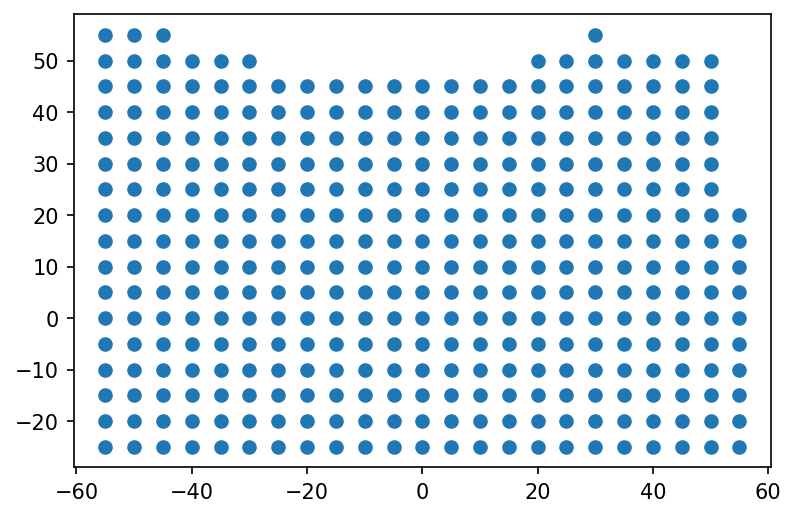

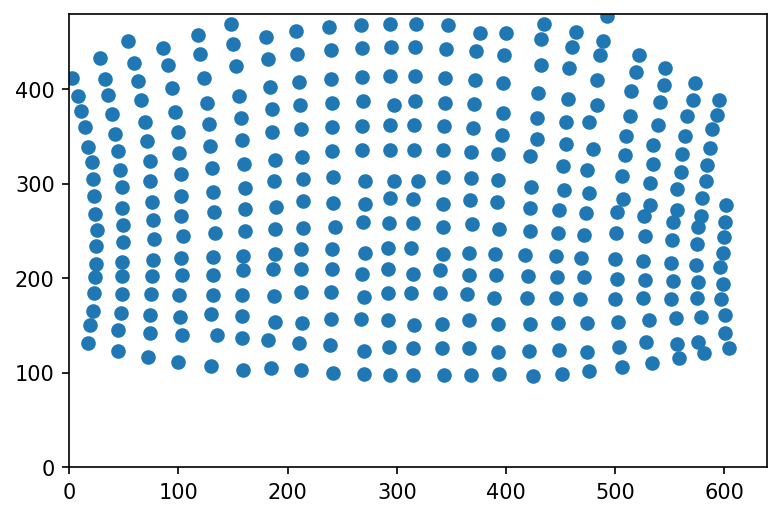

In [3]:
x,y = raw[::,0],raw[::,1]

fig, ax = plt.subplots()
ax.scatter(x, y)
plt.show()

x,y = raw[::,2],raw[::,3]

fig, ax = plt.subplots()
ax.scatter(x, y)
plt.xlim([0, 639])
plt.ylim([0, 479])
plt.show()


In [ ]:
'''
bad:
-angle offset
-pixel noise
-missing values
-the camera has some rotation in the roll axis, so pan has some vertical movement and tilt some horizontal movement

good:
-many samples
-angles on grid
-missing values mostly in 1 dimension

-tasks:
-fix offset
-convert to look-up table, quartered
-reverse table
-smooth data
-fill missing datapoints
-extrapolate?
'''

In [ ]:
line = raw[raw[::,0]==55]
dep,indep = line[::,2],line[::,1]

fig, ax = plt.subplots()
ax.scatter(x, y)
plt.xlim([0, 639])
plt.ylim([0, 479])
plt.show()

fit_func = np.poly1d(np.polyfit(indep,dep,2))
dep_fit = fit_func(indep)

indep_expanded = np.arange(-25,55+1,5)
dep_fit_expanded = fit_func(indep_expanded)

fig, ax = plt.subplots()
ax.scatter(indep, dep)
plt.show()

fig, ax = plt.subplots()
ax.scatter(indep, dep_fit)
plt.show()


fig, ax = plt.subplots()
ax.scatter(indep_expanded, dep_fit_expanded)
plt.show()



In [ ]:
#smoothing:
raw_copy = raw.copy()
raw_copy_expanded = []

for i in range(-55,55+1,5):    
    line = raw_copy[raw_copy[::,0]==i]
    dep,indep = line[::,2],line[::,1]

    fit_func = np.poly1d(np.polyfit(indep,dep,2))
    dep_fit = fit_func(indep)
    
    raw_copy[raw_copy[::,0]==i,2] = dep_fit

#     indep_expanded = np.arange(-5,70+1,2)
#     dep_fit_expanded = fit_func(indep_expanded)
#     fig, ax = plt.subplots()
#     ax.scatter(indep_expanded, dep_fit_expanded)
#     plt.show()

x,y = raw_copy[::,2],raw_copy[::,3]
fig, ax = plt.subplots()
ax.scatter(x, y)
plt.xlim([0, 639])
plt.ylim([0, 479])
plt.show()

for i in range(-25,55+1,5):    
    line = raw_copy[raw_copy[::,1]==i]
    dep,indep = line[::,3],line[::,0]

    fit_func = np.poly1d(np.polyfit(indep,dep,2))
    dep_fit = fit_func(indep)
    
    raw_copy[raw_copy[::,1]==i,3] = dep_fit

#     indep_expanded = np.arange(-55,25+1,5)
#     dep_fit_expanded = fit_func(indep_expanded)

x,y = raw_copy[::,2],raw_copy[::,3]
fig, ax = plt.subplots()
ax.scatter(x, y)
plt.xlim([0, 639])
plt.ylim([0, 479])
plt.show()




In [ ]:
# x,y = raw_copy[::,2],raw_copy[::,3]
# fig, ax = plt.subplots()
# ax.scatter(x, y)
# ax.scatter(319.5,239.5)
# plt.xlim([0, 639])
# plt.ylim([0, 479])
# plt.show()



In [ ]:
# x,y = raw_copy[::,2],raw_copy[::,3]
# distances_sqrd = (x-319.5)**2 + (y-239.5)**2

# x,y = raw_copy[::,2],raw_copy[::,3]
# fig, ax = plt.subplots()
# ax.scatter(x, y,distances_sqrd/10000)
# ax.scatter(319.5,239.5)
# plt.xlim([0, 639])
# plt.ylim([0, 479])
# plt.show()

# np.min(distances_sqrd)

# q1i = np.logical_and(raw_copy[::,2] < 319.5,raw_copy[::,3] < 239.5)
# q1 =  raw_copy[q1i]
# x,y = q1[::,2],q1[::,3]
# q1_near_i = np.argmin(distances_sqrd[q1i])
# q1_near = q1[q1_near_i]
# print(q1_near)

# fig, ax = plt.subplots()
# ax.scatter(x, y,distances_sqrd[q1i]/10000)
# ax.scatter(319.5,239.5)
# ax.scatter(q1_near[2],q1_near[3])

# plt.xlim([0, 639])
# plt.ylim([0, 479])
# plt.show()

# q2i = np.logical_and(raw_copy[::,2] > 319.5,raw_copy[::,3] < 239.5)
# q2 =  raw_copy[q2i]
# q2_near = q2[np.argmin(distances_sqrd[q2i])]
# q3i = np.logical_and(raw_copy[::,2] < 319.5,raw_copy[::,3] > 239.5)
# q3 =  raw_copy[q3i]
# q3_near = q3[np.argmin(distances_sqrd[q3i])]
# q4i = np.logical_and(raw_copy[::,2] > 319.5,raw_copy[::,3] > 239.5)
# q4 =  raw_copy[q4i]
# q4_near = q4[np.argmin(distances_sqrd[q4i])]


# x,y = raw_copy[::,2],raw_copy[::,3]

# fig, ax = plt.subplots()
# ax.scatter(x, y,distances_sqrd/10000)
# ax.scatter(319.5,239.5)
# ax.scatter(q1_near[2],q1_near[3])
# ax.scatter(q2_near[2],q2_near[3])
# ax.scatter(q3_near[2],q3_near[3])
# ax.scatter(q4_near[2],q4_near[3])

# plt.xlim([0, 639])
# plt.ylim([0, 479])
# plt.show()



In [ ]:
# a = np.array([q1_near,q2_near,q3_near,q4_near])

# print(a)

# x,y = a[::,2],a[::,3]
# z = a[::,0]
# f = interpolate.interp2d(x, y, z, kind='linear')
# x_angle_offset = f(319.5, 239.5)[0]
# z = a[::,1]
# f = interpolate.interp2d(x, y, z, kind='linear')
# y_angle_offset = f(319.5, 239.5)[0]
# print(x_angle_offset,y_angle_offset)

#todo check if f can do both dimensions at the same time -> doesn't work, len(z) != len(x)
#todo check of interp2d can me made to work on entire array -> yes! see below!


In [4]:
# find center in 1 step
# https://stackoverflow.com/questions/43946291/problems-with-scipy-interpolate-interp2d-s-or-m-too-small-no-more-knots-can
# todo check if np.meshgrid can be used to reverse table -> not possible with interpolation

x,y = raw_copy[::,2],raw_copy[::,3]
z = raw_copy[::,0:1+1]
#angle_offsets = interpolate.griddata((x, y), z,(319.5,239.5))
angle_offsets = interpolate.griddata((x, y), z,(319.5,239.5),method='cubic')
print(angle_offsets)



NameError: name 'raw_copy' is not defined

In [ ]:
# correct angle offset:
# todo find better name
raw_copy2 = raw_copy.copy()
print(raw_copy2)
raw_copy2[::,0:1+1] -= angle_offsets
print(raw_copy2)

In [ ]:
#quarter:
# todo find better name
raw_copy3 = raw_copy2.copy()

print(raw_copy3)
raw_copy3[::,2:3+1] -= (319.5,239.5)
print(raw_copy3)
raw_copy3[raw_copy3[::,0]<0,2] *= -1
raw_copy3[raw_copy3[::,0]<0,0] *= -1
raw_copy3[raw_copy3[::,1]<0,3] *= -1
raw_copy3[raw_copy3[::,1]<0,1] *= -1
print(raw_copy3)
# raw_copy3[::,2:3+1] += (319.5,239.5)

x,y = raw_copy3[::,0],raw_copy3[::,1]
fig, ax = plt.subplots()
ax.scatter(x, y,1)
plt.show()

x,y = raw_copy3[::,2],raw_copy3[::,3]
fig, ax = plt.subplots()
ax.scatter(x, y,1)
plt.xlim([0, 320*1.5])
plt.ylim([0, 240*1.5])
plt.show()

# todo check if unsmoothed data works too (yes, but datapoints are more far appart, less clustered)
# todo flip x and y in raw data so everything is positive -> done

In [ ]:
# x,y = raw_copy[::,2],raw_copy[::,3]
# z = raw_copy[::,0:1+1]

# xx = np.linspace(319, 639+1,40+1)
# yy = np.linspace(239, 479+1,40+1)
# xx, yy = np.meshgrid(xx, yy)
# grid = (xx.ravel(), yy.ravel())

# vals = interpolate.griddata((x, y), z, grid)

# pixel_to_angle = interpolate.griddata((x, y), z,grid,method='cubic')

# fig, ax = plt.subplots()
# ax.scatter(grid[0], grid[1],1)
# plt.show()

# fig, ax = plt.subplots()
# ax.scatter(pixel_to_angle[::,0], pixel_to_angle[::,1],1)
# plt.show()






# x,y = raw_copy[::,0],raw_copy[::,1]
# z = raw_copy[::,2:3+1]

# xx = np.linspace(np.min(x), np.max(x),40+1)
# yy = np.linspace(np.min(y), np.max(y),40+1)
# xx, yy = np.meshgrid(xx, yy)
# grid = (xx.ravel(), yy.ravel())

# vals = interpolate.griddata((x, y), z, grid)

# pixel_to_angle = interpolate.griddata((x, y), z,grid,method='cubic')

# pixel_to_angle = pixel_to_angle[~np.isnan(pixel_to_angle[::,0])]

# fig, ax = plt.subplots()
# ax.scatter(grid[0], grid[1],1)
# plt.show()

# fig, ax = plt.subplots()
# ax.scatter(pixel_to_angle[::,0], pixel_to_angle[::,1],1)
# plt.show()


#extrapolate:
# x,y = raw_copy2[::,2],raw_copy2[::,3]
# z = raw_copy2[::,0:1+1]
# #angle_offsets = interpolate.griddata((x, y), z,(319.5,239.5))
# inter = interpolate.griddata((x, y), z,(700.5,239.5),method='cubic')
# print(inter)

# x,y = raw_copy2[::,0],raw_copy2[::,1]
# z = raw_copy2[::,2:3+1]
# #angle_offsets = interpolate.griddata((x, y), z,(319.5,239.5))
# inter = interpolate.griddata((x, y), z,(60,0),method='cubic')
# print(inter)







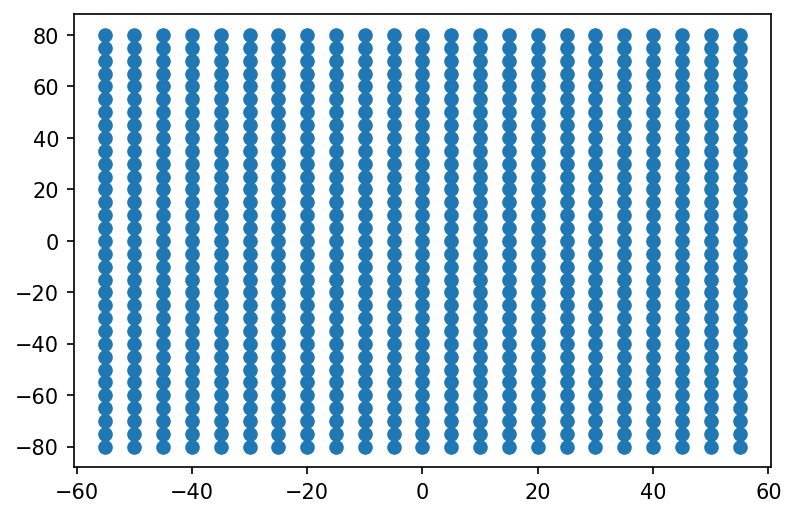

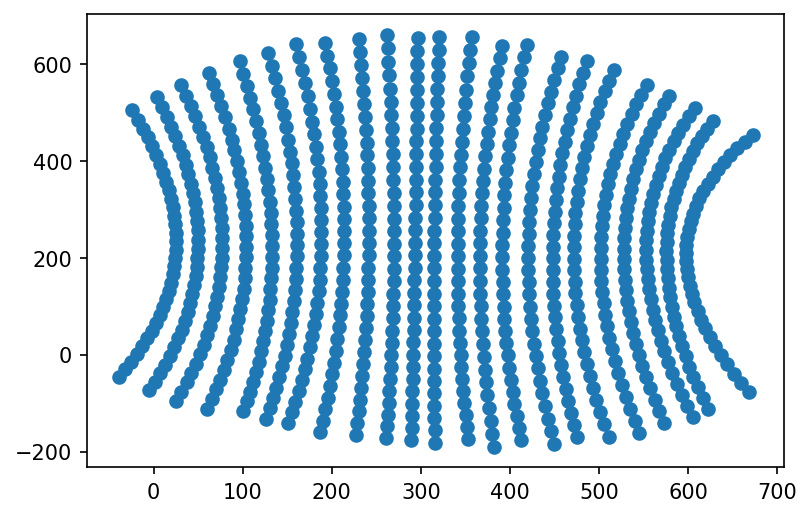

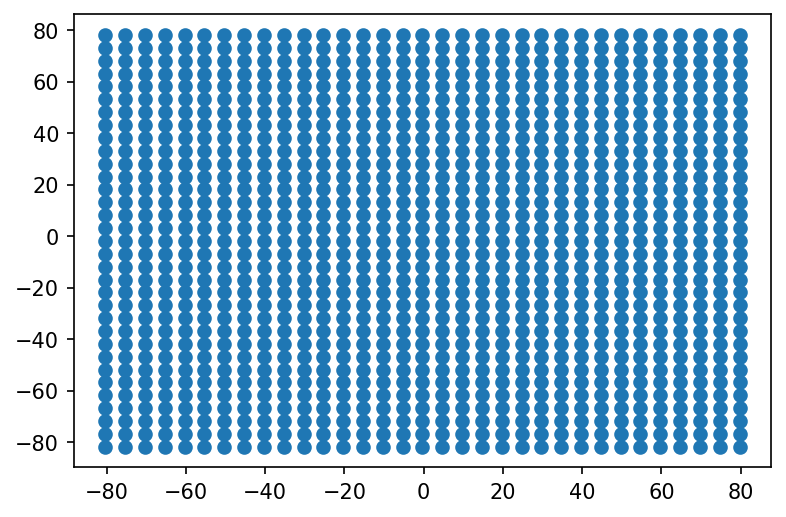

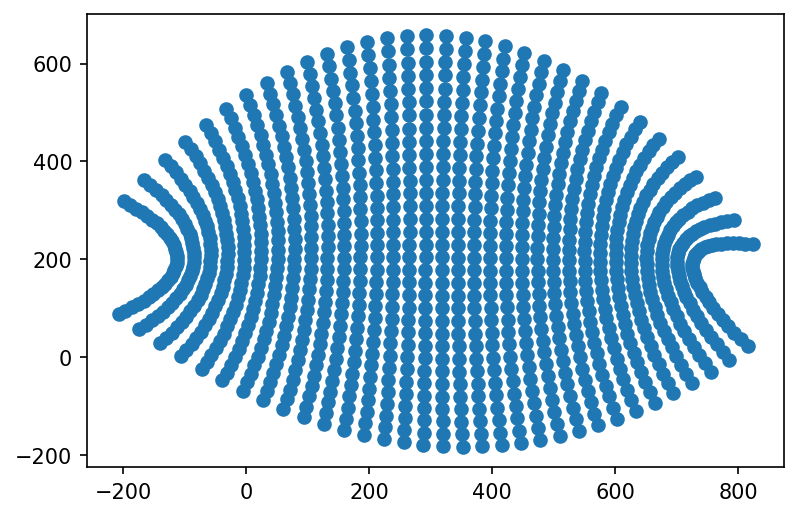

In [46]:
#extrapolation:
raw_copy = raw.copy()
raw_copy_expanded = []

#for every x angle:
for i in range(-55,55+1,5):    
    line = raw_copy[raw_copy[::,0]==i]
    dep,indep = line[::,2],line[::,1] # x pixel,y angle

    fit_func = np.poly1d(np.polyfit(indep,dep,2))
    
    indep_expanded = np.arange(-80,80+1,5)
    dep_fit_x = fit_func(indep_expanded)
#     fig, ax = plt.subplots()
#     ax.scatter(dep_fit_x, dep_fit_expanded)
#     plt.show() 
    

    dep = line[::,3]

    fit_func = np.poly1d(np.polyfit(indep,dep,2))
    
    dep_fit_y= fit_func(indep_expanded)
#     fig, ax = plt.subplots()
#     ax.scatter(dep_fit_y, dep_fit_expanded)
#     plt.show()
    
    for j in range(len(indep_expanded)):
        raw_copy_expanded.append([i,indep_expanded[j],dep_fit_x[j],dep_fit_y[j]])
   
raw_copy_expanded = np.array(raw_copy_expanded)

fig, ax = plt.subplots()
ax.scatter(raw_copy_expanded[::,0], raw_copy_expanded[::,1])
plt.show()

fig, ax = plt.subplots()
ax.scatter(raw_copy_expanded[::,2], raw_copy_expanded[::,3])
# plt.xlim([0, 639])
# plt.ylim([0, 479])
plt.show()

    

# x,y = raw_copy[::,2],raw_copy[::,3]
# fig, ax = plt.subplots()
# ax.scatter(x, y)
# plt.xlim([0, 639])
# plt.ylim([0, 479])
# plt.show()

raw_copy_expanded2 = []

for i in range(-80,80+1,5):    
    line = raw_copy_expanded[raw_copy_expanded[::,1]==i]
    dep,indep = line[::,3],line[::,0] # y pixel,x angle

    fit_func = np.poly1d(np.polyfit(indep,dep,2))
    
    indep_expanded = np.arange(-80,80+1,5)
    dep_fit_y = fit_func(indep_expanded)

    dep = line[::,2]

    fit_func = np.poly1d(np.polyfit(indep,dep,2))
    
    dep_fit_x = fit_func(indep_expanded)

    for j in range(len(indep_expanded)):
        raw_copy_expanded2.append([indep_expanded[j],i,dep_fit_x[j],dep_fit_y[j]])
    
raw_copy_expanded2 = np.array(raw_copy_expanded2)

x,y = raw_copy_expanded2[::,2],raw_copy_expanded2[::,3]
z = raw_copy_expanded2[::,0:1+1]
#angle_offsets = interpolate.griddata((x, y), z,(319.5,239.5))
angle_offsets2 = interpolate.griddata((x, y), z,(319.5,239.5),method='cubic')

# print(angle_offsets2)

raw_copy_expanded2[::,0:1+1] -= angle_offsets2

fig, ax = plt.subplots()
ax.scatter(raw_copy_expanded2[::,0], raw_copy_expanded2[::,1])
plt.show()

fig, ax = plt.subplots()
ax.scatter(raw_copy_expanded2[::,2], raw_copy_expanded2[::,3])
# plt.xlim([0, 639])
# plt.ylim([0, 479])
plt.show()


In [72]:
# put angles on aligned grid again

# # print(raw_copy_expanded2[::,0:1+1])
# # print(raw_copy_expanded2[::,2:3+1])

# x,y = raw_copy_expanded2[::,0],raw_copy_expanded2[::,1]
# z = raw_copy_expanded2[::,2:3+1]

# xx = np.linspace(-75, 75,30+1)
# yy = np.linspace(-75, 75,30+1)
# xx, yy = np.meshgrid(xx, yy)
# angle_to_pixel_grid = (xx.ravel(), yy.ravel())

# angle_to_pixel = interpolate.griddata((x, y), z, angle_to_pixel_grid,method='cubic')


# a = np.column_stack((np.array(xx),np.array(yy)) )

# print(len(angle_to_pixel))
# print(angle_to_pixel)

# # print(angle_to_pixel_grid)
# # print(angle_to_pixel)



# fig, ax = plt.subplots()
# ax.scatter(angle_to_pixel_grid[0], angle_to_pixel_grid[1],1)
# plt.show()

# fig, ax = plt.subplots()
# ax.scatter(angle_to_pixel[::,0], angle_to_pixel[::,1],1)
# plt.show()





-0.010477052861982753


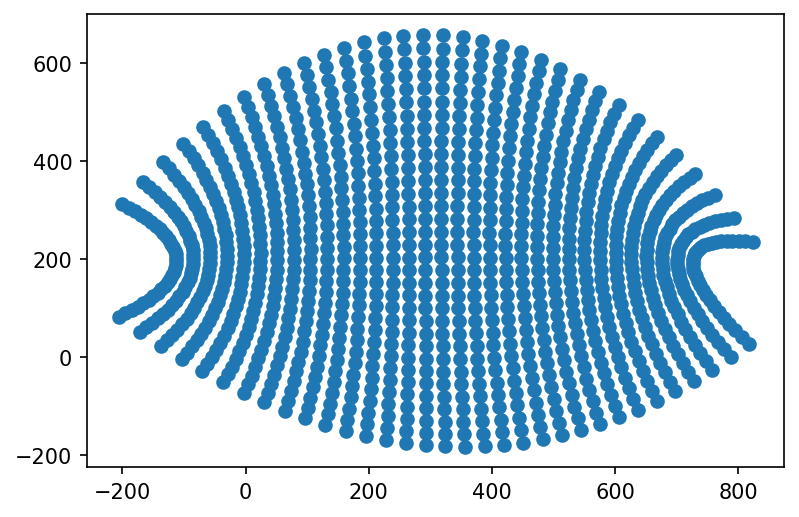

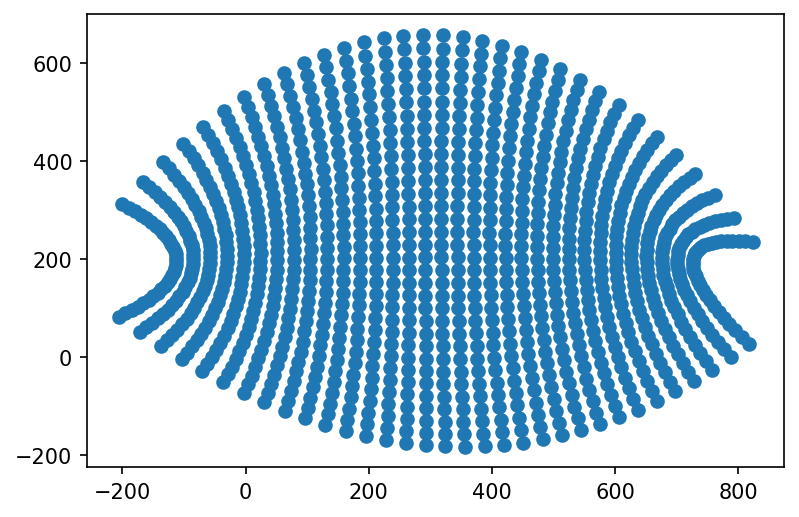

In [73]:
#detect slope and rotate:

x=raw_copy_expanded2[raw_copy_expanded2[::,1]==-angle_offsets2[1],2]
y=raw_copy_expanded2[raw_copy_expanded2[::,1]==-angle_offsets2[1],3]

slope, intercept, r_value, p_value, std_err = linregress(x, y)
print(slope)

rotation_vector = np.array([1,slope])
rotation_vector /= np.sqrt(rotation_vector[0]**2+rotation_vector[1]**2)


rotated = raw_copy_expanded2.copy() 

rotated[::,2:3+1] -= (319.5,239.5)



x, y = rotated[::,2],rotated[::,3]
c, s = rotation_vector[0],rotation_vector[1]
j = np.matrix([[c, s], [-s, c]])
m = np.dot(j, [x, y])
rotated[::,2],rotated[::,3] =  m[0,::], m[1,::]

rotated[::,2:3+1] += (319.5,239.5)

fig, ax = plt.subplots()
ax.scatter(rotated[::,2], rotated[::,3])
plt.show()


fig, ax = plt.subplots()
ax.scatter(rotated[::,2], rotated[::,3])
plt.show()

# rotated[::,2:3+1] -= (319.5,239.5)


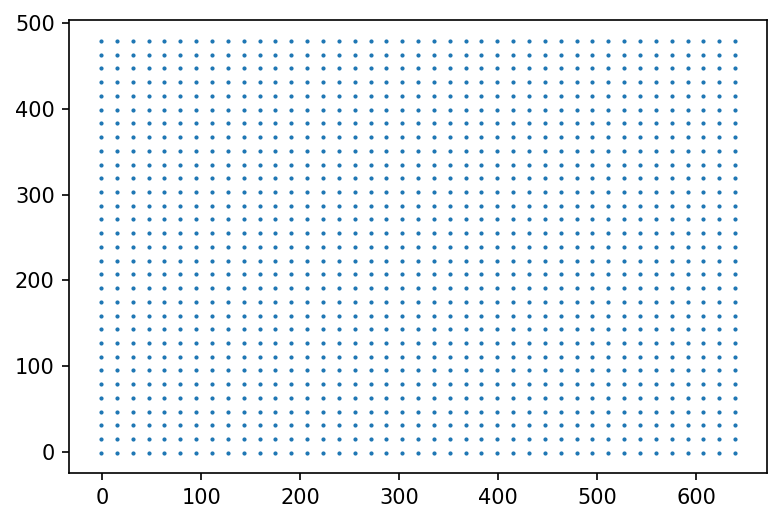

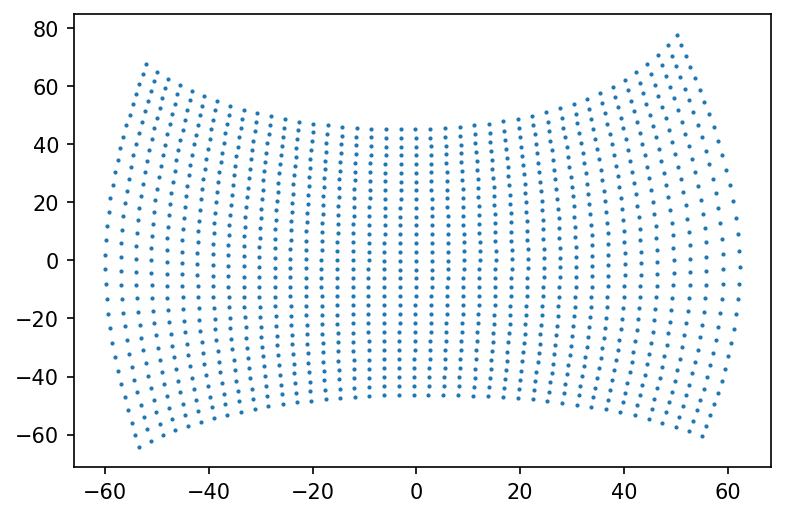

In [92]:
# reverse map:

x,y = rotated[::,2],rotated[::,3]
z = rotated[::,0:1+1]

xx = np.linspace(-1, 639,40+1)
yy = np.linspace(-1, 479,30+1)
# xx = np.linspace(np.min(x), np.max(x))
# yy = np.linspace(np.min(y), np.max(y))
xx, yy = np.meshgrid(xx, yy)
pixel_to_angle_grid = (xx.ravel(), yy.ravel())

pixel_to_angle_map = interpolate.griddata((x, y), z, pixel_to_angle_grid,method='cubic')

fig, ax = plt.subplots()
ax.scatter(pixel_to_angle_grid[0], pixel_to_angle_grid[1],1)
plt.show()

fig, ax = plt.subplots()
ax.scatter(pixel_to_angle_map[::,0], pixel_to_angle_map[::,1],1)
plt.show()



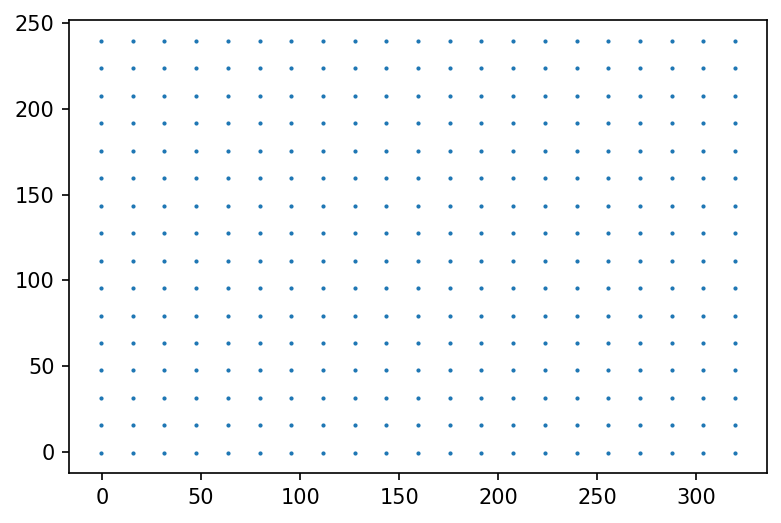

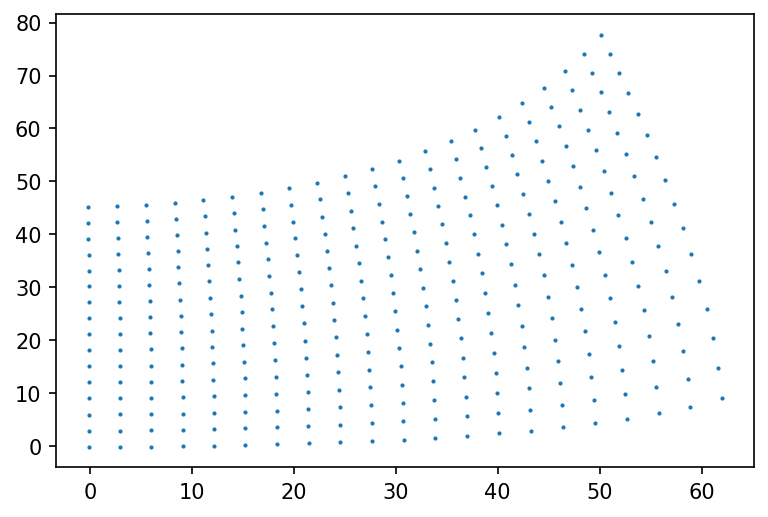

In [95]:
# quarter again
q = np.logical_and(pixel_to_angle_grid[0] >= 319,pixel_to_angle_grid[1] >= 239)

pixel_to_angle_q = pixel_to_angle_map[q,::]
pixel_to_angle_grid_q = (pixel_to_angle_grid[0][q]-319.5,pixel_to_angle_grid[1][q]-239.5)

fig, ax = plt.subplots()
ax.scatter(pixel_to_angle_grid_q[0], pixel_to_angle_grid_q[1],1)
plt.show()

fig, ax = plt.subplots()
ax.scatter(pixel_to_angle_q[::,0], pixel_to_angle_q[::,1],1)
plt.show()




In [114]:
# interpolation/extrapolation


def pixel_to_angle(p):
    p = [p[0],p[1]]
    p[0] -= 319.5
    p[1] -= 239.5
    
    flip_x = p[0]<0
    flip_y = p[1]<0
    
    p[0] = np.abs(p[0])
    p[1] = np.abs(p[1])
    
    angle = interpolate.griddata(pixel_to_angle_grid_q, pixel_to_angle_q, p,method='cubic')
    
    if np.isnan(angle).any() or True:
        # extrapolate
        print('extrapolate')
        grid = pixel_to_angle_grid_q
        mp = pixel_to_angle_q
        
        p0=p1=p2=p3=[0,0]
              
        
        x1 = grid[0].max()
        if x1 > p[0]:
            x1 = grid[0][grid[0] >= p[0]].min()
        x0 = grid[0][grid[0] < x1].max()
        
        y1 = grid[1].max()
        if y1 > p[1]:
            y1 = grid[1][grid[1] >= p[1]].min()
        y0 = grid[1][grid[1] < y1].max()           
        
        # angle points
        p0 = mp[np.logical_and(grid[0]==x0,grid[1]==y0)][0]
        p1 = mp[np.logical_and(grid[0]==x1,grid[1]==y0)][0]
        p2 = mp[np.logical_and(grid[0]==x0,grid[1]==y1)][0]
        p3 = mp[np.logical_and(grid[0]==x1,grid[1]==y1)][0] 
        
        fit_func = np.poly1d(np.polyfit([p0[0],p1[0]],dep,1))
        x = fit_func(indep_expanded)


             
         
        
    
    if flip_x:
        angle[0] *= -1
    
    if flip_y:
        angle[1] *= -1
        
    
    return angle
    
    
p = (319.5,239.5)    
print(p,pixel_to_angle(p))  
p = (200,239.5)    
print(p,pixel_to_angle(p))  
p = (400,239.5)    
print(p,pixel_to_angle(p))  
p = (319.5,300)    
print(p,pixel_to_angle(p))  
p = (319.5,500)    
print(p,pixel_to_angle(p))  
p = (600.5,239.5)    
print(p,pixel_to_angle(p))  
p = (700.5,239.5)    
print(p,pixel_to_angle(p))  
p = (700.5,500)    
print(p,pixel_to_angle(p))  
        


extrapolate
[False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  T

In [147]:
p0 = pixel_to_angle_q[np.logical_and(pixel_to_angle_grid_q[0]==-0.5,pixel_to_angle_grid_q[1]==-0.5)][0]

print(p0)


[-0.09581515 -0.09537889]
